<a href="https://colab.research.google.com/github/musstafa08-bug/Poem-Generator/blob/master/Poem_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Load Packages
import tensorflow as tf
from keras.callbacks import LambdaCallback
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Activation, LSTM, Bidirectional, Embedding, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import random

In [2]:
data = open('/content/shakespear.txt').read()
corpus = data.lower().split('\n')
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
words = tokenizer.word_index
total_words = len(words) + 1
print(words)
print(total_words)

{'the': 1, 'and': 2, 'to': 3, 'of': 4, 'in': 5, 'my': 6, 'i': 7, 'that': 8, 'thy': 9, 'thou': 10, 'with': 11, 'a': 12, 'for': 13, 'is': 14, 'not': 15, 'you': 16, 'but': 17, 'love': 18, 'me': 19, 'thee': 20, 'be': 21, 'or': 22, 'this': 23, 'so': 24, 'all': 25, 'as': 26, 'it': 27, 'by': 28, 'which': 29, 'his': 30, 'when': 31, 'do': 32, 'your': 33, 'from': 34, 'gutenberg': 35, 'on': 36, 'are': 37, 'no': 38, 'if': 39, 'doth': 40, 'project': 41, 'have': 42, 'then': 43, 'what': 44, 'more': 45, 'mine': 46, 'their': 47, 'shall': 48, 'will': 49, 'sweet': 50, 'they': 51, 'tm': 52, 'time': 53, 'can': 54, 'eyes': 55, 'beauty': 56, 'nor': 57, 'art': 58, 'her': 59, 'yet': 60, 'heart': 61, 'than': 62, 'o': 63, 'work': 64, 'any': 65, '1': 66, 'should': 67, 'self': 68, 'make': 69, 'he': 70, 'where': 71, 'now': 72, 'one': 73, 'may': 74, 'thine': 75, 'how': 76, 'hath': 77, 'fair': 78, 'still': 79, 'at': 80, 'see': 81, 'him': 82, 'true': 83, 'eye': 84, 'such': 85, 'like': 86, 'am': 87, 'works': 88, 'those

In [3]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

In [4]:
#padding
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_length, padding = 'pre'))

In [7]:
# labels and predictors
Xs = input_sequences[:,:-1]
labels = input_sequences[:,-1]
Ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [9]:
print(words['I'])
print(words['From'])
print(words['fariest'])
print(words['creatures'])
print(words['we'])
print(words['desire'])
print(words['increase'])

KeyError: ignored

In [ ]:
print(Xs[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]


In [ ]:
print(Ys[5])

[0. 0. 0. ... 0. 0. 0.]


In [24]:
model = Sequential()
model.add(Embedding(total_words, 120, input_length = max_sequence_length-1))
model.add(Bidirectional(LSTM(300)))
model.add(Dense(total_words, activation = 'softmax'))
adam = Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history = model.fit(Xs, Ys, epochs = 100, verbose = 1)
print(model)

Epoch 1/100
574/574 [==============================] - 7s 12ms/step - loss: 6.9407 - accuracy: 0.0278
Epoch 2/100
574/574 [==============================] - 7s 13ms/step - loss: 6.4129 - accuracy: 0.0478
Epoch 3/100
574/574 [==============================] - 7s 12ms/step - loss: 6.0128 - accuracy: 0.0648
Epoch 4/100
574/574 [==============================] - 7s 12ms/step - loss: 5.5731 - accuracy: 0.0831
Epoch 5/100
574/574 [==============================] - 7s 12ms/step - loss: 5.0618 - accuracy: 0.1095
Epoch 6/100
574/574 [==============================] - 7s 12ms/step - loss: 4.4696 - accuracy: 0.1476
Epoch 7/100
574/574 [==============================] - 7s 12ms/step - loss: 3.8391 - accuracy: 0.2199
Epoch 8/100
574/574 [==============================] - 7s 12ms/step - loss: 3.2211 - accuracy: 0.3287
Epoch 9/100
574/574 [==============================] - 7s 12ms/step - loss: 2.6794 - accuracy: 0.4315
Epoch 10/100
574/574 [==============================] - 7s 12ms/step - loss: 2.238

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

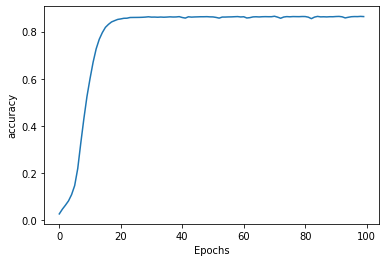

In [26]:
plot_graphs(history, 'accuracy')

In [27]:
seed_text = "Simp is getting ready for Simping"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text +=  " "  +output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Simp is getting ready for Simping my sake even so as it bring me up not praise now one by me find seen she write seem fair part vulgar day to counted she due climb'd thee ground ' with the wide she he and contracted to dwell his dwell in brow ' forth in this face thou hast it bright the very same part of now longer stain may lies answer sick it no pencil also grow of the time do show you your grow and donations and provide a fee for obtaining a copy upon the united states medium a project gutenberg tm license project
